In [1]:
# import liabraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statistics

In [2]:
# read the dataset
data = pd.read_csv("F:/Python/Projects/IMDB-Movie-Data.csv")
data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


# Data Info & Cleaning

In [3]:
# Shape of data
data.shape

(1000, 12)

In [4]:
#Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Rank                  1000 non-null int64
Title                 1000 non-null object
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             936 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.8+ KB


In [5]:
# Check for Duplicates
mis_val=data.duplicated().any()
print(mis_val)

False


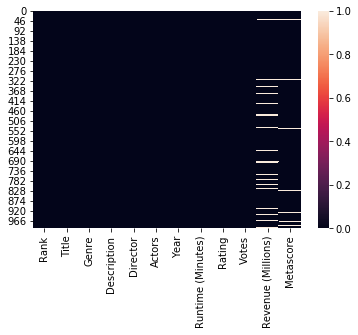

In [6]:
#Let's check for null values
sns.heatmap(data.isnull())

From the heat map we found the missing values in Revenue and metascore. let's see how many misssing values we got.

In [7]:
data.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [8]:
# percentage of missing values
perc_missing = data.isnull().sum()*100/len(data)
print(perc_missing)

Rank                   0.0
Title                  0.0
Genre                  0.0
Description            0.0
Director               0.0
Actors                 0.0
Year                   0.0
Runtime (Minutes)      0.0
Rating                 0.0
Votes                  0.0
Revenue (Millions)    12.8
Metascore              6.4
dtype: float64


In [9]:
#Drop null values
#movies=data.dropna(axis=0)
#movies.head()

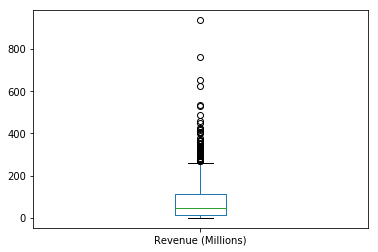

In [10]:
#Boxplot to check outliers
data['Revenue (Millions)'].plot(kind='box')

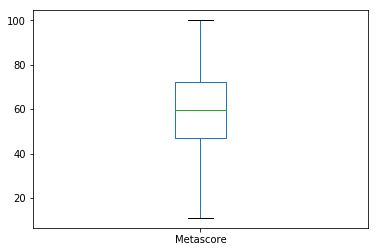

In [11]:
#Boxplot to check outliers
data['Metascore'].plot(kind='box')

In [12]:
data.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


From the boxplot, we found the outliers in the data. The standard deviation for Revenue is 103.25 which data is far from the mean(widely spread). so, we try to impute the missing values with the median. 
The standard deviation for Metascore is 17.19 which data is not far from the mean. so, we try to impute the missing values with mean. 

In [13]:
#Imputing missing values with mean and median
up_data = data
up_data['Revenue (Millions)']=up_data['Revenue (Millions)'].fillna(up_data['Revenue (Millions)'].median())

In [14]:
up_data['Metascore']=up_data['Metascore'].fillna(up_data['Metascore'].mean())
up_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Rank                  1000 non-null int64
Title                 1000 non-null object
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    1000 non-null float64
Metascore             1000 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.8+ KB


I used the mean and median to replace missing values, but there are other techniques to deal with missing values based on the data we are using.

In [15]:
up_data.isnull().sum().sum()

0

In [16]:
up_data.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,78.480040,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,97.118097,16.634858
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,17.442500,47.750000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,58.985043
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,99.177500,71.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


# Analysis

In [17]:
# Movies with highest runtime
up_data.nlargest(10,'Runtime (Minutes)')[['Title','Runtime (Minutes)']].set_index('Title')

,Runtime (Minutes)
Title,
Grindhouse,191
The Hateful Eight,187
The Wolf of Wall Street,180
La vie d'Adèle,180
Inland Empire,180
Cloud Atlas,172
3 Idiots,170
Interstellar,169
Pirates of the Caribbean: At World's End,169


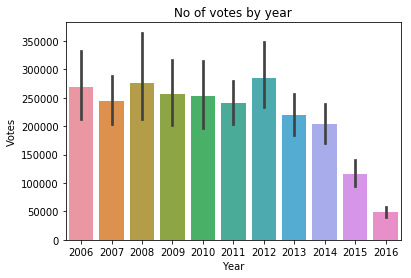

In [18]:
# Yearly votes
sns.barplot(x='Year',y='Votes',data= up_data)
plt.title('No of votes by year')
plt.show()

In [19]:
# No of movies in each year
up_data['Year'].value_counts()

2016    297
2015    127
2014     98
2013     91
2012     64
2011     63
2010     60
2007     53
2008     52
2009     51
2006     44
Name: Year, dtype: int64

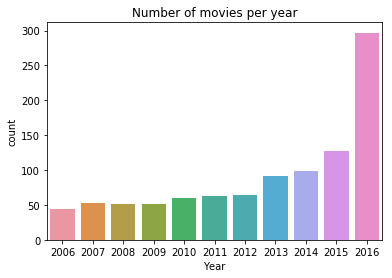

In [20]:
# No of movies in each year
sns.countplot(x='Year',data=up_data)
plt.title('Number of movies per year')
plt.show()

In [21]:
#Title of the movie with it's Highest & Lowest revenue
print(up_data[up_data['Revenue (Millions)'].max()==up_data['Revenue (Millions)']]['Title'])
print(up_data[up_data['Revenue (Millions)'].min()==up_data['Revenue (Millions)']]['Title'])

50    Star Wars: Episode VII - The Force Awakens
Name: Title, dtype: object
231    A Kind of Murder
Name: Title, dtype: object


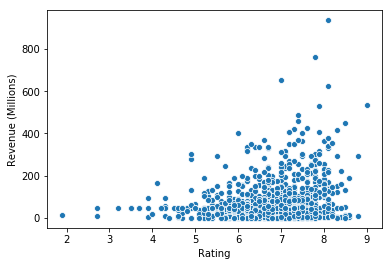

In [22]:
#How the rating effects the revenue
sns.scatterplot(x='Rating',y='Revenue (Millions)',data=up_data)

In [23]:
# Let's add new column(rating_status) with more meaningful using rating 
def rating(rating):
    if rating>=7.0:
        return "Excellent"
    elif rating>=6.0:
        return "Good"
    elif rating>=4.0:
        return "Average"
    else:
        return "Below Average"

In [24]:
up_data['rating_status']=up_data['Rating'].apply(rating)

In [25]:
up_data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,rating_status
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Excellent
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Excellent
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Excellent
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Excellent
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,Good


In [26]:
#check the rating_status of movies how good they are
r_status = up_data['rating_status'].value_counts()
r_status

Excellent        445
Good             371
Average          173
Below Average     11
Name: rating_status, dtype: int64

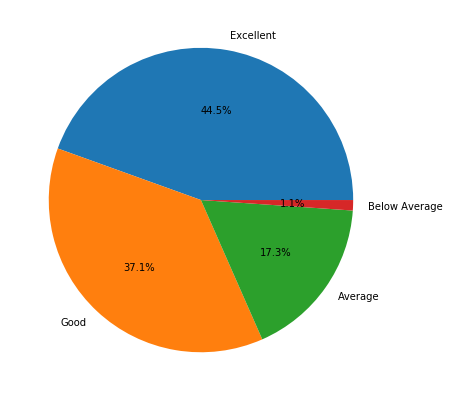

In [27]:
labels=['Excellent', 'Good', 'Average', 'Below Average']
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(r_status, labels=labels, autopct='%1.1f%%')
 
# show plot
plt.show()